# ทำไมจึงไม่กำหนดค่าน้ำหนักเป็น 0

สาเหตุที่ไม่กำหนดให้เป็น 0 ทั้งหมดเหมือนตอนที่ทำเพอร์เซปตรอนชั้นเดียวก็คือ เนื่องจากเราต้องการให้เซลล์ประสาทแต่ละตัวมีการทำหน้าที่ต่างกันไป ดังนั้นมันจะต้องมีความแตกต่างกัน ยิ่งมากยิ่งดี

แต่หากกำหนดน้ำหนักเริ่มต้นทุกตัวเป็น 0 หมดเท่ากับว่าทุกเซลล์จะมีการคำนวณที่เหมือนกันหมดตั้งแต่แรก พอเวลาปรับค่าน้ำหนักก็จะถูกปรับไปในทิศทางเดียวกันหมด เมื่อทุกตัวเหมือนกัน การมีเซลล์ประสาทหลายตัวก็ไม่ก่อให้เกิดประโยชน์อะไร

นี่คือเหตุผลที่จะให้ค่าน้ำหนักเริ่มต้นเป็น 0 ไม่ได้

ส่วนค่าไบแอส b ให้เป็น 0 ไปก็ไม่มีปัญหาอะไร โดยทั่วไปจึงถูกกำหนดเป็น 0 อยู่แล้ว

## โดยทั่วไป w จะถูกกำหนดให้สุ่มโดยแจกแจงแบบเกาส์ แต่จะให้ความกว้าง σ เป็นเท่าไหร่นั้นไม่มีกฎเกณฑ์ตายตัว

# ค่าเริ่มต้นของซาวีเย โกลโร และ เหอ ไข่หมิง
### ระบุว่าเมื่อใช้ซอฟต์แม็กซ์เป็นฟังก์ชันกระตุ้นแล้ว ค่า σ ที่เหมาะสมที่สุดคือ
## $$ \begin{align}
\sigma = \frac{1}{\sqrt{m}}
\end{align}
$$
#### m คือจำนวนมิติขาเข้าของข้อมูล
#### การตั้งค่าเริ่มต้นแบบนี้จึงถูกเรียกว่า***ค่าตั้งต้นแบบซาวีเย (Xavier Initialization)***

# เหอ ไข่หมิง (何恺明, Hé Kǎimíng) บอกว่าเมื่อใช้ ReLU เป็นฟังก์ชันกระตุ้น ค่า σ ที่เหมาะสมที่สุดคือ
## $$ \begin{align}
\sigma = \sqrt{\frac{2}{m}}
\end{align} $$
#### ค่าตั้งต้นแบบนี้จึงได้ถูกเรียกว่า***ค่าตั้งต้นแบบเหอ (Hé Initialization)***


# Compare initial weigths
#### ลองทำการสร้างข้อมูลจำนวนหนึ่งที่มีตัวแปรสักร้อยตัวขึ้นมาแบบสุ่ม แล้วให้ผ่านการด็อตกับน้ำหนักแล้วตามด้วยชั้นซิกมอยด์ รวมทั้งหมด ๕ ชั้น
#### แล้วสร้างฮิสโทแกรมแสดงการกระจายของค่าเทียบดูว่าค่าตั้งต้น ๔ แบบต่างกัน คือ 1, 0.01, Xavier, Hé จะให้ผลต่างกันยังไง

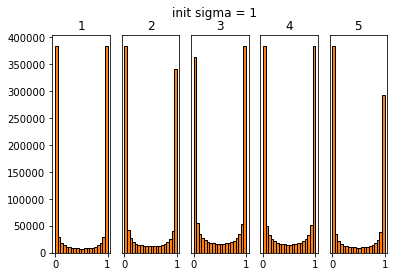

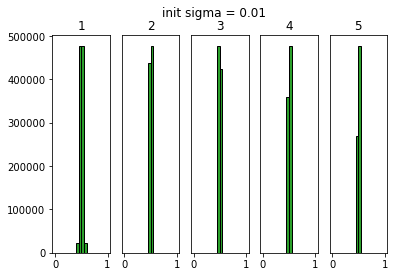

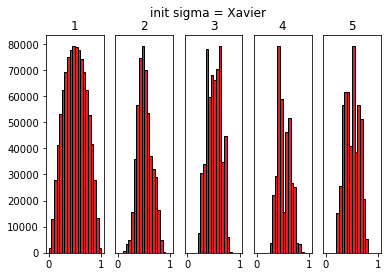

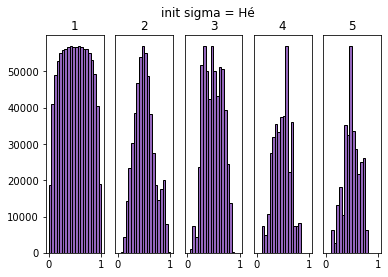

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)
    
m = 100 # จำนวนตัวแปรในแต่ละชั้น
n = 10000 # จำนวนข้อมูล
n_chan = 5 # จำนวนชั้น
x = np.random.normal(0,1,[n,m]) # สุ่มตัวแปรต้น
sigma = [1, 0.01, 1./np.sqrt(m), np.sqrt(2./m)]
for j in range(4):
    h = x
    plt.figure().suptitle('init sigma = ' + ['1','0.01','Xavier','Hé'][j])
    for i in range(n_chan):
        w = np.random.normal(0,sigma[j],[m,m])
        a = np.dot(h,w) # +0
        h = sigmoid(a)
        # h = relu(a) # รอบหน้าลองเปลี่ยนมาใช้ ReLU
        plt.subplot(1,n_chan,i+1)
        plt.title('%d'%(i+1))
        if(i>0):
            plt.yticks([],[])
        plt.hist(h.flatten(),20,(0,1),ec='k',color='C%d'%(j+1))
plt.show()